# Final Project

## Group 8: Anna, Dhairya, Martin, Nikyah, Sindhura

## <font color= Blue> Question 2: Models </font>
### LIF:

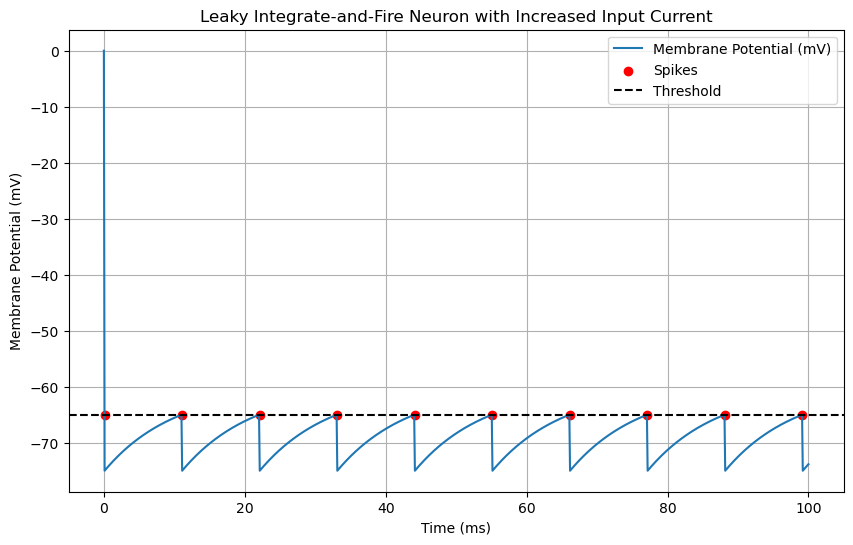

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 1.0         # Membrane capacitance (in arbitrary units)
R = 10.0        # Membrane resistance (in arbitrary units)
tau = R * C     # Time constant
V_rest = -70    # Resting membrane potential (in mV)
V_th = -65      # Threshold potential (in mV)
V_reset = -75   # Reset potential (in mV)
dt = 0.1        # Time step (in milliseconds)
t_max = 100     # Total simulation time (in milliseconds)

# Increased input current
I_in = 1      # Input current (in arbitrary units)

# Simulation
num_steps = int(t_max / dt)
time = np.linspace(0, t_max, num_steps)
V = np.zeros(num_steps)
spikes = []

# Simulation loop
for i in range(1, num_steps):
    dVdt = -(V[i-1] - V_rest) / tau + I_in / C  # Membrane potential dynamics with added input current
    V[i] = V[i-1] + dt * dVdt                   # Update membrane potential

    if V[i] >= V_th:                            # Check for spike
        spikes.append(i)
        V[i] = V_reset                          # Reset membrane potential after spike

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (mV)')
plt.scatter([s * dt for s in spikes], [V_th] * len(spikes), color='red', label='Spikes', marker='o')
plt.axhline(y=V_th, color='black', linestyle='--', label='Threshold')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron without Voltage Gated Sodium Channels')
plt.legend()
plt.grid(True)
plt.show()


### Voltage Gated Channels added to LIF:

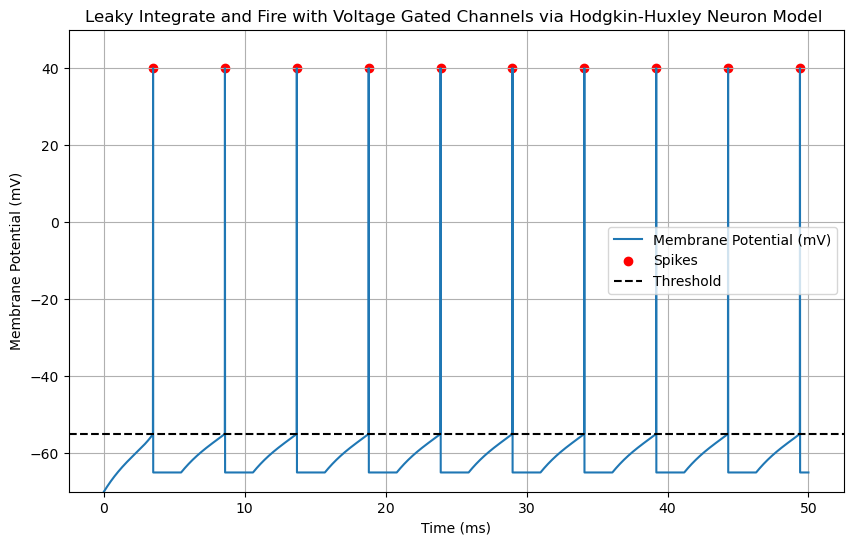

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 1.0         # Membrane capacitance (in microfarads per square cm)
V_rest = -70    # Resting membrane potential (in mV)
V_th = -55      # Threshold potential (in mV)
V_peak = 40     # Peak potential (in mV)
V_reset = -65   # Reset potential (in mV)
tau_ref = 2     # Refractory period (in milliseconds)
E_Na = 60       # Sodium equilibrium potential (in mV)
E_K = -72       # Potassium equilibrium potential (in mV)
E_L = -50       # Leak equilibrium potential (in mV)
g_Na = 120      # Maximum sodium conductance (in mS/cm^2)
g_K = 36        # Maximum potassium conductance (in mS/cm^2)
g_L = 0.3       # Leak conductance (in mS/cm^2)
dt = 0.01       # Time step (in milliseconds)
t_max = 50      # Total simulation time (in milliseconds)

# Hodgkin-Huxley gating variables
alpha_n = lambda V: 0.01 * (V + 50) / (1 - np.exp(-(V + 50) / 10))
beta_n = lambda V: 0.125 * np.exp(-(V + 60) / 80)
alpha_m = lambda V: 0.1 * (V + 35) / (1 - np.exp(-(V + 35) / 10))
beta_m = lambda V: 4.0 * np.exp(-0.0556 * (V + 60))
alpha_h = lambda V: 0.07 * np.exp(-0.05 * (V + 60))
beta_h = lambda V: 1 / (1 + np.exp(-0.1 * (V + 30)))

# Simulation
num_steps = int(t_max / dt)
time = np.linspace(0, t_max, num_steps)
V = np.zeros(num_steps)
n = np.zeros(num_steps)
m = np.zeros(num_steps)
h = np.zeros(num_steps)
spikes = []

# Initial conditions
V[0] = V_rest
n[0] = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
m[0] = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
h[0] = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))
refractory_until = 0  # Time until which the neuron is in refractory period

# Simulation loop
for i in range(1, num_steps):
    if i < refractory_until:
        # Neuron is in refractory period
        V[i] = V_reset
        continue
    
    # Update gating variables
    n[i] = n[i-1] + dt * (alpha_n(V[i-1]) * (1 - n[i-1]) - beta_n(V[i-1]) * n[i-1])
    m[i] = m[i-1] + dt * (alpha_m(V[i-1]) * (1 - m[i-1]) - beta_m(V[i-1]) * m[i-1])
    h[i] = h[i-1] + dt * (alpha_h(V[i-1]) * (1 - h[i-1]) - beta_h(V[i-1]) * h[i-1])
    
    # Compute membrane currents
    I_Na = g_Na * m[i]**3 * h[i] * (V[i-1] - E_Na)
    I_K = g_K * n[i]**4 * (V[i-1] - E_K)
    I_L = g_L * (V[i-1] - E_L)
    
    # Update membrane potential using the membrane currents
    dVdt = (1 / C) * (-(I_Na + I_K + I_L))
    V[i] = V[i-1] + dt * dVdt
    
    # Check for spike
    if V[i] >= V_th:
        spikes.append(i)
        V[i] = V_peak  # Set peak potential
        refractory_until = i + int(tau_ref / dt)  # Set refractory period duration
        n[i] = alpha_n(V_reset) / (alpha_n(V_reset) + beta_n(V_reset))
        m[i] = alpha_m(V_reset) / (alpha_m(V_reset) + beta_m(V_reset))
        h[i] = alpha_h(V_reset) / (alpha_h(V_reset) + beta_h(V_reset))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (mV)')
plt.scatter([s * dt for s in spikes], [V_peak] * len(spikes), color='red', label='Spikes', marker='o')
plt.axhline(y=V_th, color='black', linestyle='--', label='Threshold')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate and Fire with Voltage Gated Channels via Hodgkin-Huxley Neuron Model ')
plt.ylim(-70, V_peak + 10)  # Adjust y-axis limits to show spikes reaching peak potential
plt.legend()
plt.grid(True)
plt.show()


### Simple Neural Network - Feedforward: 

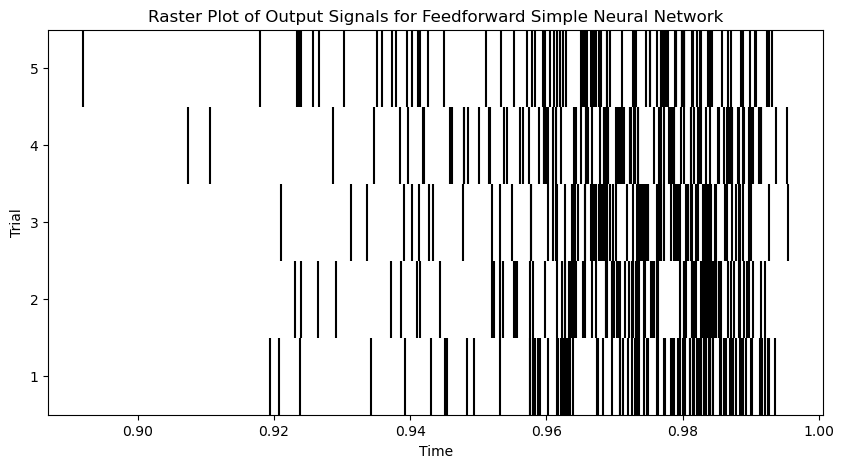

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_inputs = 10  # Number of input neurons
num_outputs = 1  # Number of output neurons
num_samples = 100  # Number of input samples
num_trials = 5  # Number of trials
threshold = 0.5  # Threshold for activation

# Initialize weights and biases
weights = np.random.rand(num_inputs, num_outputs)
biases = np.random.rand(num_outputs)

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot the raster plot
plt.figure(figsize=(10, 5))
for trial in range(num_trials):
    # Generate random input signals for each trial
    input_signals = np.random.rand(num_samples, num_inputs)
    
    # Calculate output signals for each trial
    output_signals = []
    for i in range(num_samples):
        net_input = np.dot(input_signals[i], weights) + biases
        output = sigmoid(net_input)
        output_signals.append(output)
    
    # Convert output signals to raster plot for each trial
    raster_plot = np.array(output_signals).reshape(num_samples)
    
    # Plot raster plot for each trial with y-axis offset
    plt.eventplot(raster_plot, color='black', lineoffsets=trial)

plt.title('Raster Plot of Output Signals for Feedforward Simple Neural Network')
plt.xlabel('Time')
plt.ylabel('Trial')
plt.yticks(np.arange(num_trials), np.arange(1, num_trials + 1))
plt.ylim(-0.5, num_trials - 0.5)  # Adjust y-axis limit based on the number of trials
plt.show()


***
## <font color= Blue> Question Three:

The leaky integrate and fire neuron model models the biological neuron and it is used to simulate neural networks. One benefit of this model is that it is a simpler representation of the biological neuron. Another benefit is that this model can capture the generation of spikes and the integration of synaptic inputs. Limitations to this model include not accounting for the precise timing of spikes, oversimplifying the detailed mechanisms involved in action potential generation, and the fact that the model doesn’t include mechanisms for synaptic plasticity.

The LIF model updated to include voltage gated sodium channels is more detailed than just the original LIF model talked about previously. The addition of the voltage gated sodium channels allows for action potentials to be generated by the rapid influx of sodium ions which cause an increase in membrane potential when the channels are open. Benefits of this model include replicating the essential mechanism for generating action potential in more detail and a more realistic representation of spike generation. Limitations include the model being more difficult to analyze because the addition of the sodium channels makes it more complex, the fact that parameters need to be specified and matched to experimental data, and that the simulation of the model will require more time.

In a feedforward neural network information flows using connections from the input layer, through one or more hidden layers, and through the output layer. Benefits of this model include it being more precise in approximation of continuous functions, gradient based optimization can be used to train these models to minimize a loss function, and despite the model being more efficient it is simple and easy to interpret. Limitations of this model include a fixed input size, overfitting if there is a large number of parameters, and gradients becoming very small or very large in deep networks with many layers. 

Of the three models, we predict that the simple neural network would contain the most information/have the most bits according to information theory. The simple neural network involves communication between several nodes rather than looking at the self-contained information that a single neuron holds with its intrinsic firing patterns. Due to this consideration of a multiitude of communicating nodes/neuronswe would expect the neural network to have more bits and a higher degree of complexity compared to each of the single neuron models. Between the two single neuron models, we would expect the LIF with simulated voltage-gated sodium channels to contain more bits and be more complex that the plain LIF neuron model. As previously discussed, addition of voltage-gated sodium channels to LIF neuron models allows for the simulation of variance in synapoc strength, not unlike simulation of long-term potentiation and long-term depression in BNNs. This new capability allows for the variance of synaptic “weights”, which can add a great deal of complexity to any neural network that the neuron becomes part of. To recap, we believe that the simple neural network contains the most bits, and the plain LIF model contains the least bits. In accordance with information theory, it would therefore makes sense to presume that the simple neural network is the most concise/efficient, and that the plain LIF model is the least concise/efficient (although it may be easier to decode in comaprison to a simple neural network). 

***
## <font color= Blue> Question Four:

### original model:

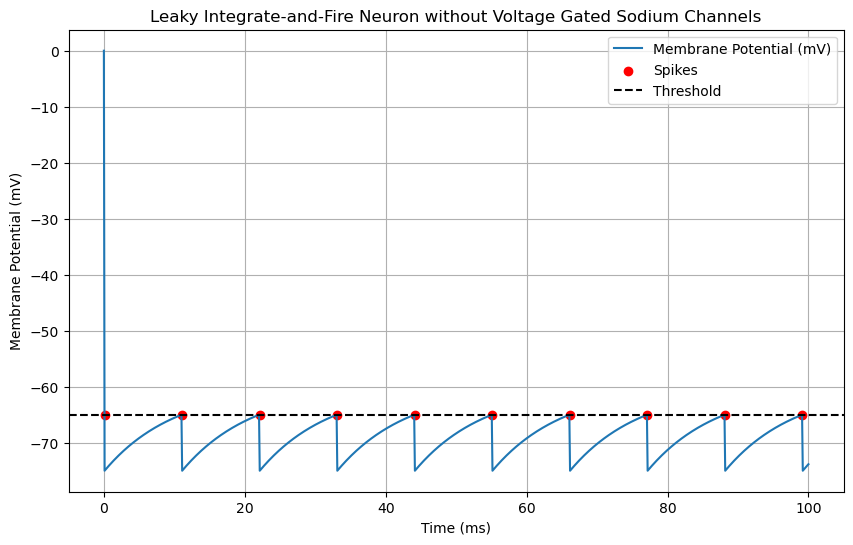

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 1.0         # Membrane capacitance (in arbitrary units)
R = 10.0        # Membrane resistance (in arbitrary units)
tau = R * C     # Time constant
V_rest = -70    # Resting membrane potential (in mV)
V_th = -65      # Threshold potential (in mV)
V_reset = -75   # Reset potential (in mV)
dt = 0.1        # Time step (in milliseconds)
t_max = 100     # Total simulation time (in milliseconds)

# Increased input current
I_in = 1      # Input current (in arbitrary units)

# Simulation
num_steps = int(t_max / dt)
time = np.linspace(0, t_max, num_steps)
V = np.zeros(num_steps)
spikes = []

# Simulation loop
for i in range(1, num_steps):
    dVdt = -(V[i-1] - V_rest) / tau + I_in / C  # Membrane potential dynamics with added input current
    V[i] = V[i-1] + dt * dVdt                   # Update membrane potential

    if V[i] >= V_th:                            # Check for spike
        spikes.append(i)
        V[i] = V_reset                          # Reset membrane potential after spike

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (mV)')
plt.scatter([s * dt for s in spikes], [V_th] * len(spikes), color='red', label='Spikes', marker='o')
plt.axhline(y=V_th, color='black', linestyle='--', label='Threshold')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron without Voltage Gated Sodium Channels')
plt.legend()
plt.grid(True)
plt.show()


### modified model:

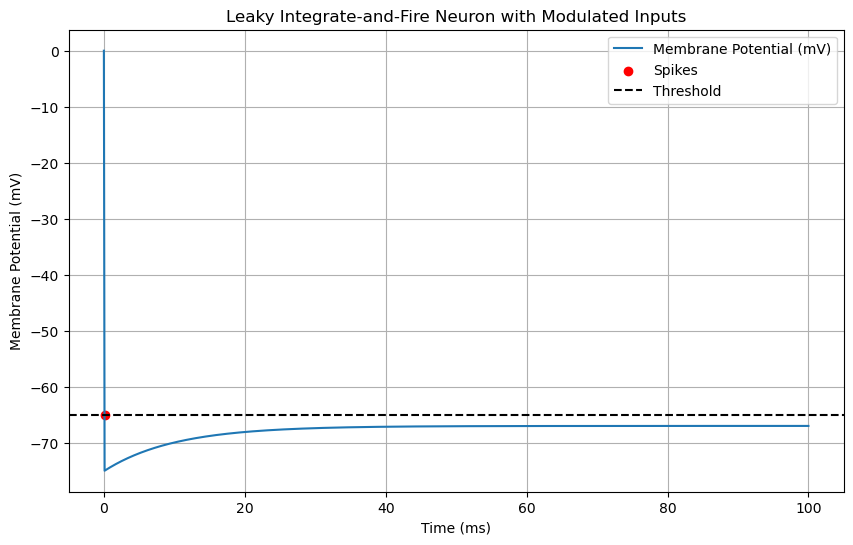

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 1.0         # Membrane capacitance (in arbitrary units)
R = 10.0        # Membrane resistance (in arbitrary units)
tau = R * C     # Time constant
V_rest = -70    # Resting membrane potential (in mV)
V_th = -65      # Threshold potential (in mV)
V_reset = -75   # Reset potential (in mV)
dt = 0.1        # Time step (in milliseconds)
t_max = 100     # Total simulation time (in milliseconds)

# Increased input current
I_in = 0.3     # Input current (in arbitrary units)

# Simulation
num_steps = int(t_max / dt)
time = np.linspace(0, t_max, num_steps)
V = np.zeros(num_steps)
spikes = []

# Simulation loop
for i in range(1, num_steps):
    dVdt = -(V[i-1] - V_rest) / tau + I_in / C  # Membrane potential dynamics with added input current
    V[i] = V[i-1] + dt * dVdt                   # Update membrane potential

    if V[i] >= V_th:                            # Check for spike
        spikes.append(i)
        V[i] = V_reset                          # Reset membrane potential after spike

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (mV)')
plt.scatter([s * dt for s in spikes], [V_th] * len(spikes), color='red', label='Spikes', marker='o')
plt.axhline(y=V_th, color='black', linestyle='--', label='Threshold')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron with Modulated Inputs')
plt.legend()
plt.grid(True)
plt.show()


### In order to create the changes seen, we updated the code to modify the amount of input current to showcase the changes that occur because of these. As shown, when the current is not high enough, the inputs are not able to reahc threshold and therefore no spikes occur. This was done by changes the input current from 1 to 0.3 which led to the change in which the neuron is not able to reach a membrane potential that crosses threshold and leads to spikes. 

***
## <font color= Blue> Question Five:

### original model:

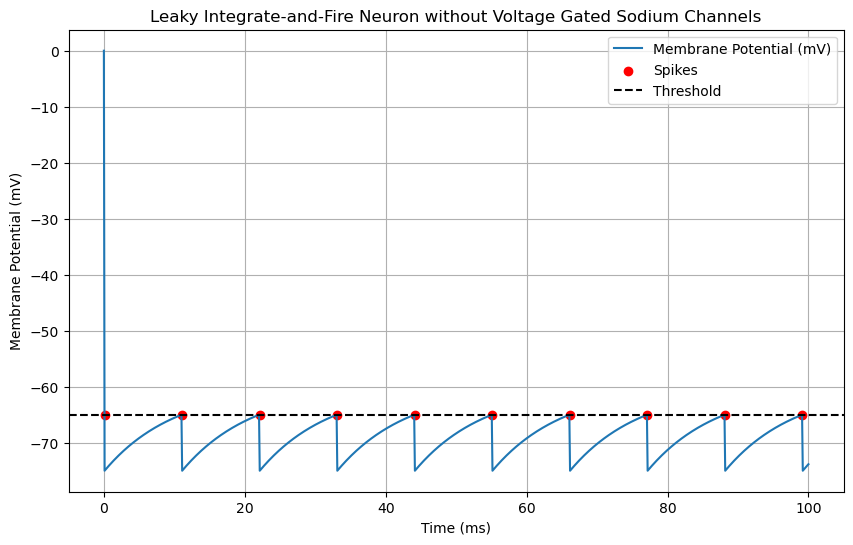

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 1.0         # Membrane capacitance (in arbitrary units)
R = 10.0        # Membrane resistance (in arbitrary units)
tau = R * C     # Time constant
V_rest = -70    # Resting membrane potential (in mV)
V_th = -65      # Threshold potential (in mV)
V_reset = -75   # Reset potential (in mV)
dt = 0.1        # Time step (in milliseconds)
t_max = 100     # Total simulation time (in milliseconds)

# Increased input current
I_in = 1      # Input current (in arbitrary units)

# Simulation
num_steps = int(t_max / dt)
time = np.linspace(0, t_max, num_steps)
V = np.zeros(num_steps)
spikes = []

# Simulation loop
for i in range(1, num_steps):
    dVdt = -(V[i-1] - V_rest) / tau + I_in / C  # Membrane potential dynamics with added input current
    V[i] = V[i-1] + dt * dVdt                   # Update membrane potential

    if V[i] >= V_th:                            # Check for spike
        spikes.append(i)
        V[i] = V_reset                          # Reset membrane potential after spike

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (mV)')
plt.scatter([s * dt for s in spikes], [V_th] * len(spikes), color='red', label='Spikes', marker='o')
plt.axhline(y=V_th, color='black', linestyle='--', label='Threshold')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron without Voltage Gated Sodium Channels')
plt.legend()
plt.grid(True)
plt.show()

### Updated Model to Include Inhibitory Inputs:

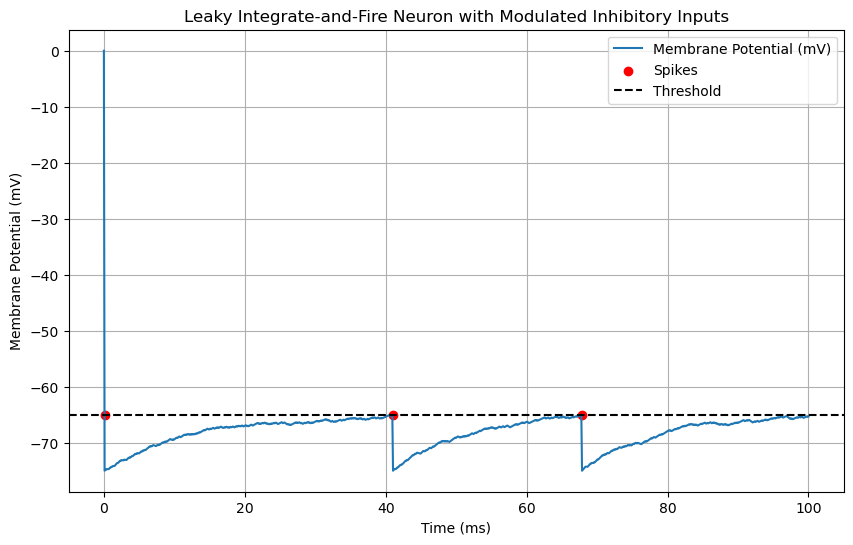

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 1.0         # Membrane capacitance (in arbitrary units)
R = 10.0        # Membrane resistance (in arbitrary units)
tau = R * C     # Time constant
V_rest = -70    # Resting membrane potential (in mV)
V_th = -65      # Threshold potential (in mV)
V_reset = -75   # Reset potential (in mV)
dt = 0.1        # Time step (in milliseconds)
t_max = 100     # Total simulation time (in milliseconds)

# Excitatory input current
I_excitatory = 1  # Input current (in arbitrary units)

# Probability of an input being inhibitory
p_inhibitory = 0.35  # Adjust as needed

# Simulation
num_steps = int(t_max / dt)
time = np.linspace(0, t_max, num_steps)
V = np.zeros(num_steps)
spikes = []

# Simulation loop
for i in range(1, num_steps):
    # Determine if the input is excitatory or inhibitory based on probability
    if np.random.rand() < p_inhibitory:
        I_in = -0.5  # Inhibitory input current
    else:
        I_in = I_excitatory  # Excitatory input current
    
    dVdt = -(V[i-1] - V_rest) / tau + I_in / C  # Membrane potential dynamics with added input currents
    V[i] = V[i-1] + dt * dVdt                   # Update membrane potential

    if V[i] >= V_th:                            # Check for spike
        spikes.append(i)
        V[i] = V_reset                          # Reset membrane potential after spike

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane Potential (mV)')
plt.scatter([s * dt for s in spikes], [V_th] * len(spikes), color='red', label='Spikes', marker='o')
plt.axhline(y=V_th, color='black', linestyle='--', label='Threshold')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron with Modulated Inhibitory Inputs')
plt.legend()
plt.grid(True)
plt.show()

### As shown in the above models, by adding in inhibitory inputs, which we did by modifying our original LIF and now including a variable in which the probability of a current being inhibited can be modulated, we show that the model takes much longer to reach a spike and less spikes occur compared to the original model. An important factor here is the x axis which showcase how different the firing rates are between these two models. 

***
## <font color= Blue> Question Six

### Shannon Entropy
> ### What is Information Theory? 
One model that can help in better understanding how neurons encode and transmit information throughout the brain is defined by information theory. This theory relies on the notion that the amount of information contained in any given signal is defined by the amount of uncertainty or surprise that the signal can reduce. In other words, if the question is “Did the coin land on heads or tails?” a signal that states which side the coin landed on will convey a lot of information. Thus, this theory implies that the length of the message or the meaning do not directly correlate to the amount of information. Because the firing patterns of neurons can be considered signals as well, it is possible to use Information Theory to better understand the variability that is associated with neuronal responses to various stimuli.
Through the lens of information theory, the efficiency of systems that convey information can be assessed. Information theory posits that by measuring and quantifying the amount of information that is conveyed by the response pattern of a neuron to different stimuli, the efficiency of entire neural circuits can be calculated using optimization for information transmission and energy expenditure. One method to measure the efficiency of these systems is to use Shannon’s Entropy. 

> ### What is Shannon’s Entropy?
Shannon’s entropy is a method to quantify the amount of uncertainty that a random variable or a random process has and can thus provide a measure of how much information is carried by the variable or process. When a neuron or a neural circuit is shown to have a higher entropy, it suggests that there is a greater amount of uncertainty and that the information conveyed by the neuron or the circuit is potentially greater. In applying a measure of Shannon’s Entropy to the brain, we can better describe the signal variability that is seen to relate to different and complex behavioral outputs. It can also provide an indication of the information capacity that the brain has in relation to its efficiency for the transmission of this information.

> ### What is the relation between Shannon’s Entropy and Code Efficiency?
When information is encoded, the goal is to design a code such that the redundancy can be minimized while retaining the appropriate and necessary information. When studying the neural circuits of the brain, the aim is to understand how the brain is able to optimize the transmission of information while reducing the number of times a neuron must fire in order to convey that information. By doing so, the amount of energy and resource expenditure by the brain can be minimized. Thus, this measure is helpful in better understanding how neural circuitry and the processing of information can be modeled by artificial neural networks and deep neural networks.



> ### How to Calculate Shannon’s Entropy?
The formula for Shannon's entropy (H) is expressed as the sum of the probability (P) of each possible outcome (x) multiplied by the logarithm (log) of that probability’s reciprocal. 
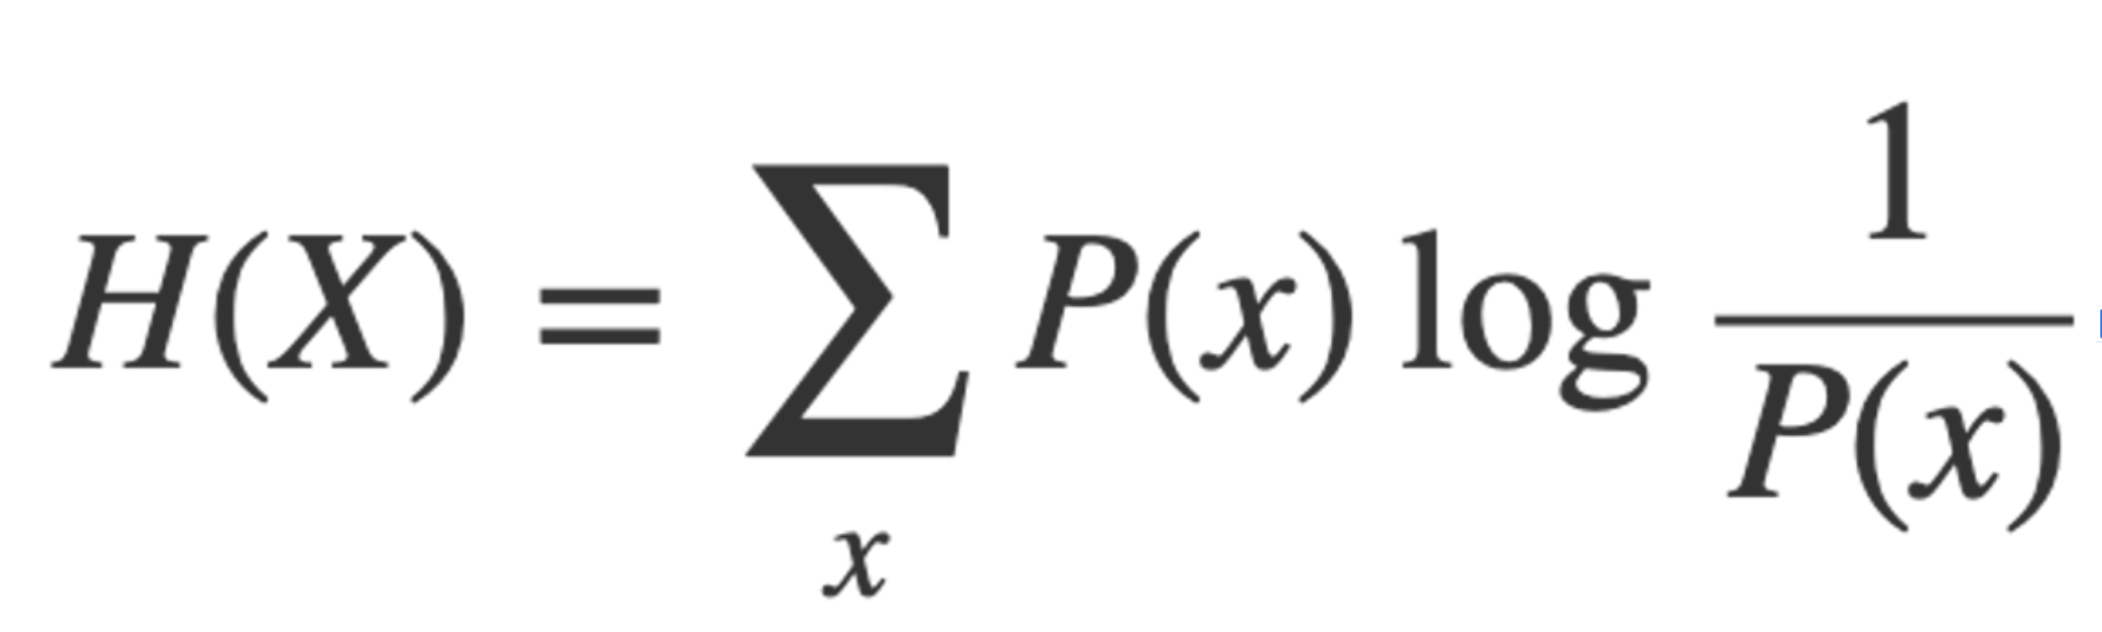
For example, consider a coin toss with two possible outcomes: heads (H) or tails (T). If the probability of getting heads is 0.5 and the probability of getting tails is also 0.5, then the entropy of this system can be calculated as follows: H = (0.5 * log2(1/0.5) + 0.5 * log2(1/0.5)) = (0.5 * (1) + 0.5 * (1)) = (0.5 + 0.5) = 1. Thus, the entropy of a fair coin toss is 1 bit, indicating that there is one bit of uncertainty associated with each toss.

Interpretation:

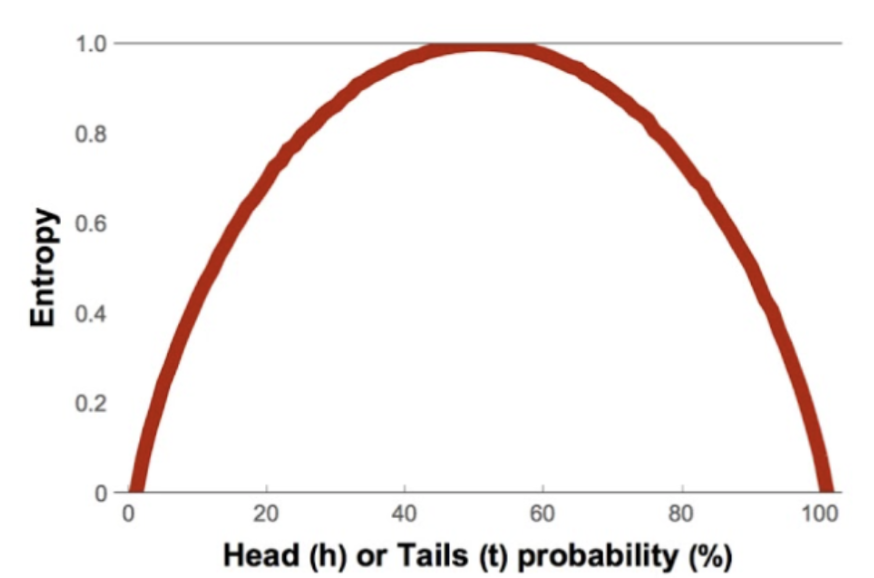

It can be seen from the graph above that the probability of an event can influence the entropy of that variable such that the greatest entropy is present when the event is unbiased. However, when the event has more bias such that the events do not have an equally likely probability, the entropy of the system will decrease drastically.


***
## <font color= Blue> Question 7

### Fun Fact about Cats: The collarbone in cats, which is known as the clavicle, is not directly attached to any other bones in their body. This is part of why they have such great flexibility and agility as they move around.


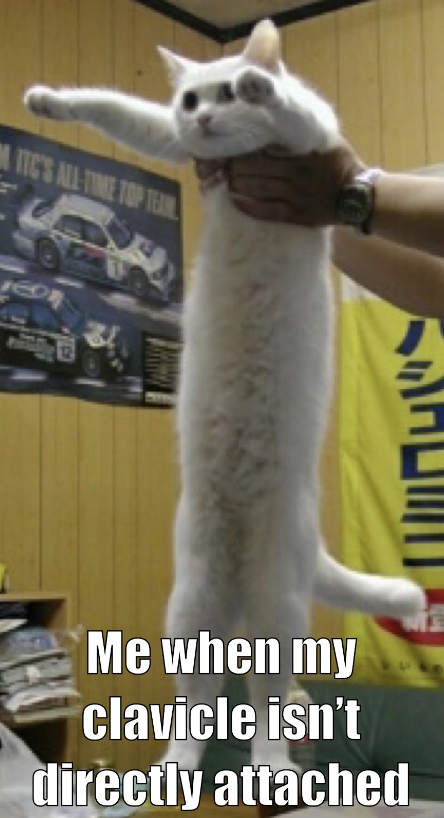